# The Wonderful World of Embeddings

## GloVe: Global Vectors for Word Representation
https://nlp.stanford.edu/projects/glove/

In [1]:
import csv
import os
import pandas as pd

file_path = './resources/glove.6B.50d.txt'
glove_embedding = pd.read_csv(file_path, sep=' ', index_col=0, header=None, quoting=csv.QUOTE_NONE)

print(f'Vocabulary size: \t{len(glove_embedding):,}')
print(f'Embedding dimension: \t{len(glove_embedding.iloc[0])}')
print(f'Embedding file size: \t{os.stat(file_path).st_size / 1e6:.1f} MB')

glove_embedding.head(10)

Vocabulary size: 	400,000
Embedding dimension: 	50
Embedding file size: 	171.4 MB


,1,2,3,4,5,6,7,8,9,10,...,41,42,43,44,45,46,47,48,49,50
0,,,,,,,,,,,,,,,,,,,,,
the,0.418000,0.249680,-0.41242,0.121700,0.345270,-0.044457,-0.49688,-0.178620,-0.000660,-0.656600,...,-0.298710,-0.157490,-0.347580,-0.045637,-0.442510,0.187850,0.002785,-0.184110,-0.115140,-0.785810
",",0.013441,0.236820,-0.16899,0.409510,0.638120,0.477090,-0.42852,-0.556410,-0.364000,-0.239380,...,-0.080262,0.630030,0.321110,-0.467650,0.227860,0.360340,-0.378180,-0.566570,0.044691,0.303920
.,0.151640,0.301770,-0.16763,0.176840,0.317190,0.339730,-0.43478,-0.310860,-0.449990,-0.294860,...,-0.000064,0.068987,0.087939,-0.102850,-0.139310,0.223140,-0.080803,-0.356520,0.016413,0.102160
of,0.708530,0.570880,-0.47160,0.180480,0.544490,0.726030,0.18157,-0.523930,0.103810,-0.175660,...,-0.347270,0.284830,0.075693,-0.062178,-0.389880,0.229020,-0.216170,-0.225620,-0.093918,-0.803750
to,0.680470,-0.039263,0.30186,-0.177920,0.429620,0.032246,-0.41376,0.132280,-0.298470,-0.085253,...,-0.094375,0.018324,0.210480,-0.030880,-0.197220,0.082279,-0.094340,-0.073297,-0.064699,-0.260440
and,0.268180,0.143460,-0.27877,0.016257,0.113840,0.699230,-0.51332,-0.473680,-0.330750,-0.138340,...,-0.069043,0.368850,0.251680,-0.245170,0.253810,0.136700,-0.311780,-0.632100,-0.250280,-0.380970
in,0.330420,0.249950,-0.60874,0.109230,0.036372,0.151000,-0.55083,-0.074239,-0.092307,-0.328210,...,-0.486090,-0.008027,0.031184,-0.365760,-0.426990,0.421640,-0.116660,-0.507030,-0.027273,-0.532850
a,0.217050,0.465150,-0.46757,0.100820,1.013500,0.748450,-0.53104,-0.262560,0.168120,0.131820,...,0.138130,0.369730,-0.642890,0.024142,-0.039315,-0.260370,0.120170,-0.043782,0.410130,0.179600
"""",0.257690,0.456290,-0.76974,-0.376790,0.592720,-0.063527,0.20545,-0.573850,-0.290090,-0.136620,...,0.030498,-0.395430,-0.385150,-1.000200,0.087599,-0.310090,-0.346770,-0.314380,0.750040,0.970650


In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt


def visualize_embeddings(embedding, items):
    plt.rcParams["figure.figsize"] = (16, 12)

    items.reverse()
    fig, axis = plt.subplots()
    axis.set_aspect(4)
    item_names = []
    item_embeddings = []
    for item in items:
        if isinstance(item, str):
            item_names.append(item)
            item_embeddings.append(embedding.loc[item])
        elif type(item) is tuple:
            item_names.append(item[0])
            item_embeddings.append(item[1])
    embedding_visualization = axis.pcolormesh(item_embeddings, vmin=-1.5, vmax=1.5)
    axis.set_xlabel('embedding dimensions', fontsize='xx-large')
    axis.set_yticks(np.arange(len(item_names)) + 0.5, minor=False)
    axis.set_yticklabels(item_names, fontsize='xx-large')

    plt.show()

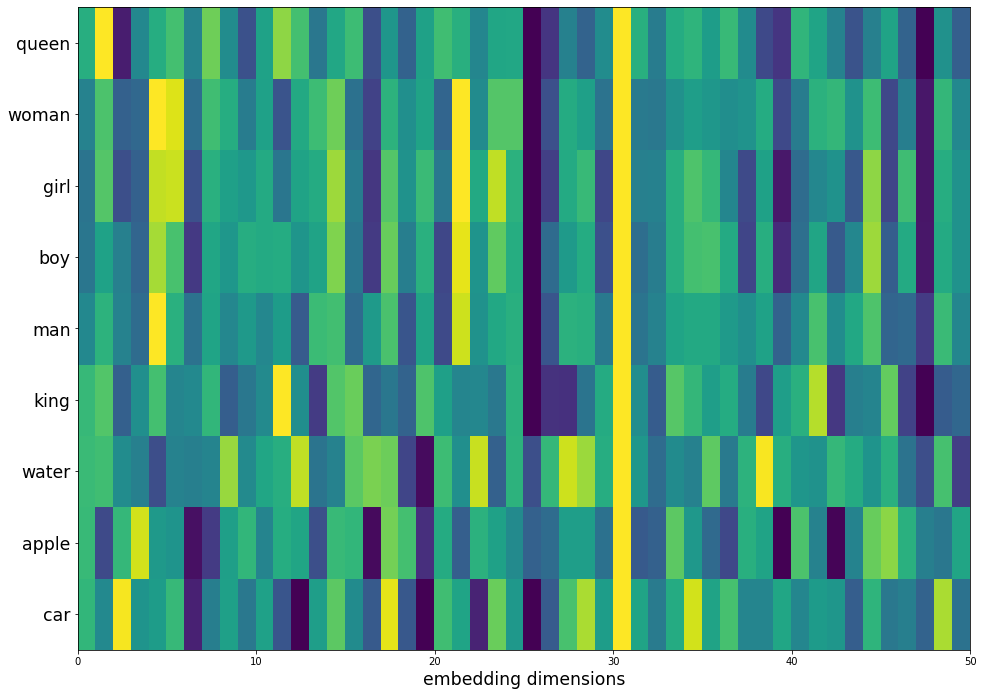

In [3]:
visualize_embeddings(glove_embedding, ['queen', 'woman', 'girl', 'boy', 'man', 'king', 'water', 'apple', 'car'])

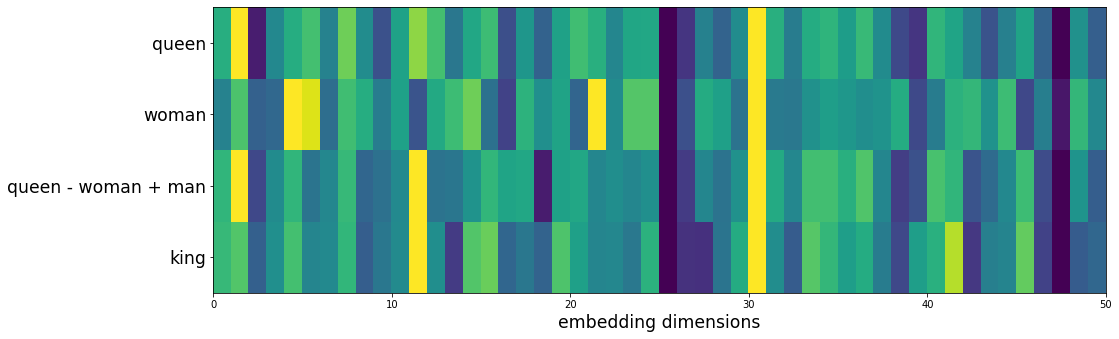

In [4]:
visualize_embeddings(glove_embedding, [
    'queen',
    'woman',
    ('queen - woman + man', glove_embedding.loc['queen'] - glove_embedding.loc['woman'] + glove_embedding.loc['man']),
    'king',
])

In [ ]:
import numpy as np
import sys


EUCLIDIAN_MEASUREMENT = 'euclidian'
COSINE_SIMILARITY_MEASUREMENT = 'cosine'

def euclidian_distance(a, b):
    return -np.linalg.norm(a - b)

def cosine_similarity(a, b):
    return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

def get_nearest_neighbors(embedding, reference_item, distance_measurement=COSINE_SIMILARITY_MEASUREMENT, limit=10):
    n_nearest = [('', -sys.maxsize) for _ in range(limit)]
    reference_embedding = embedding.loc[reference_item]
    distance_measurement_function = euclidian_distance if distance_measurement == EUCLIDIAN_MEASUREMENT else cosine_similarity
    for item in embedding.index:
        try:
            similarity = distance_measurement_function(reference_embedding, embedding.loc[item])
        except KeyError:
            print(item)
        if similarity > n_nearest[limit - 1][1]:
            n_nearest[limit - 1] = (item, similarity)
        n_nearest.sort(key=lambda element: element[1], reverse=True)

    return n_nearest

print(get_nearest_neighbors(glove_embedding, 'frog', EUCLIDIAN_MEASUREMENT))

## Embeddings in Machine Learning Frameworks

In [ ]:
from keras.layers import Embedding

# ...
model.add(Embedding(input_dim=len(vocabulary), output_dim=50))
# ...

In [ ]:
from torch import nn

# ...
self.embedding = nn.Embedding(num_embeddings=len(vocabulary), embedding_dim=50)
# ...

## Spam Detection

Binary classification task using the [SMS Spam Collection Dataset](https://www.kaggle.com/uciml/sms-spam-collection-dataset) from [kaggle](https://www.kaggle.com).

In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence

Using TensorFlow backend.


In [6]:
# Read and preprocess data

data = pd.read_csv('./resources/spam.csv', sep=',', encoding='latin-1')
data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)
data.rename(columns={'v1': 'label', 'v2': 'input_text'}, inplace=True)
data.replace({'label': {'ham': 0, 'spam': 1}}, inplace=True)
data.head()

,label,input_text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
# Preprocess data and build datasets
num_words = 1500
sequence_length = 120

tokenizer = Tokenizer(num_words=num_words, lower=True)
tokenizer.fit_on_texts(data['input_text'])
input_sequences = tokenizer.texts_to_sequences(data['input_text'])
padded_input_sequences = sequence.pad_sequences(input_sequences, maxlen=sequence_length)

X_train, X_test, Y_train, Y_test = train_test_split(padded_input_sequences, data['label'], test_size=0.2)

In [8]:
print(data['input_text'][3])
print(padded_input_sequences[3])

U dun say so early hor... U c already then say...
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   6 245 152  23 379   6 140 154  57 152]


In [10]:
# Define model

from keras.models import Sequential
from keras.layers import Embedding, LSTM, Activation

embedding_dim = 32

model = Sequential([
    Embedding(input_dim=num_words, output_dim=embedding_dim, input_length=sequence_length),
    LSTM(units=1, dropout=0.2),
    Activation('sigmoid'),
])

model.summary()

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 120, 32)           48000     
_________________________________________________________________
lstm_2 (LSTM)                (None, 1)                 136       
_________________________________________________________________
activation_2 (Activation)    (None, 1)                 0         
Total params: 48,136
Trainable params: 48,136
Non-trainable params: 0
_________________________________________________________________


In [14]:
# Train model

from keras.callbacks import EarlyStopping

model.fit(x=X_train, y=Y_train,
          batch_size=32, epochs=10,
          callbacks=[EarlyStopping(monitor='val_loss', min_delta=0.001)],
          validation_split=0.2)

Train on 3565 samples, validate on 892 samples
Epoch 1/10
1952/3565 [===============>..............] - ETA: 23s - loss: 0.4585 - acc: 0.9728

KeyboardInterrupt: 

In [13]:
# Evaluate model using the test set

test_metrics = model.evaluate(x=X_test, y=Y_test)

print(f'Test metrics: \n Loss: {test_metrics[0]:.3f} \n Accuracy: {test_metrics[1]:.3f}')

1115/1115 [==============================] - 2s 2ms/step
Test metrics: 
 Loss: 0.471 
 Accuracy: 0.972
